# PV - Task 1 - Dashboard

In [5]:
import pandas as pd
import numpy as np
import altair as alt
from altair import datum
#import datetime
#import pickle

import sys
sys.path.append("../library/")
from load_data import *
%load_ext autoreload
%autoreload 2

PATH_DATA = '../data/'
# to enable Altair in the classic notebook
alt.renderers.enable('notebook')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


RendererRegistry.enable('notebook')

## Mapa Comarques i Trend Quantitat - Familia

In [12]:
df_graph = load_df(PATH_DATA)
year_family_quantity = df_graph.groupby(['Any', 'NomMacrofamilia'], as_index=False).agg({"Quantitat": "sum", "Quantitat_norm":"sum"})
year_family_quantity.Any = pd.to_datetime(year_family_quantity.Any, format='%Y')

In [13]:
df = load_df(PATH_DATA)
df.sort_values(
    ["Any","NomComarca","NomMacrofamilia"],
    ascending=[True, True, True],
    inplace=True
)
#df.set_index(["Any","IDComarca","NomComarca","NomMacrofamilia"], inplace=True)
print(df.shape)
df.head()

(968, 7)


,NomComarca,Any,NomMacrofamilia,Quantitat,IDComarca,Poblacio,Quantitat_norm
0,Anoia,2007,"Arròs, pasta, sucre i llegums",688.50,6,111004.0,6.202479
1,Anoia,2007,Begudes i infusions,3486.00,6,111004.0,31.404274
2,Anoia,2007,"Carn, peix i embotits",481.50,6,111004.0,4.337682
3,Anoia,2007,Conserves i plats preparats,5027.04,6,111004.0,45.287017
4,Anoia,2007,Farines i derivats,1414.10,6,111004.0,12.739181


In [14]:
df_piv = df.pivot_table("Quantitat", ["Any","IDComarca","NomComarca","Poblacio"], "NomMacrofamilia")
df_piv = df_piv.rename(columns=str).reset_index()
df_piv["NomMacroFamiliaTop"] = df_piv[NOMS_FAMILIES].idxmax(axis=1)
df_piv["IDComarca"] = df_piv["IDComarca"].astype(int)
df_piv

NomMacrofamilia,Any,IDComarca,NomComarca,Poblacio,"Arròs, pasta, sucre i llegums",Begudes i infusions,"Carn, peix i embotits",Conserves i plats preparats,Farines i derivats,Fruites i verdures fresques,Làctics i derivats,Olis i greixos,NomMacroFamiliaTop
0,2007,6,Anoia,111004.0,688.500,3486.000,481.50,5027.040,1414.100,5674.500,3017.670,645.000,Fruites i verdures fresques
1,2007,7,Bages,175937.0,93.000,210.500,15.00,511.620,82.950,30.000,308.300,30.000,Conserves i plats preparats
2,2007,11,Baix Llobregat,762567.0,10291.480,58877.500,6991.63,73673.260,18103.600,84911.500,49956.490,10092.360,Fruites i verdures fresques
3,2007,13,Barcelonès,2202323.0,54355.060,199094.980,33220.97,366323.310,102171.990,250864.000,194845.060,58946.020,Conserves i plats preparats
4,2007,14,Berguedà,40372.0,114.000,39.000,35.00,530.000,191.000,248.000,321.080,62.000,Conserves i plats preparats
5,2007,17,Garraf,134434.0,774.500,2968.500,361.00,6314.620,1537.850,479.000,1758.400,960.000,Conserves i plats preparats
6,2007,21,Maresme,410525.0,2872.350,8808.500,4765.15,17123.310,4427.500,25796.500,9791.690,3795.500,Fruites i verdures fresques
7,2007,24,Osona,146459.0,321.000,1449.000,4757.15,467.000,-9.500,32536.500,987.420,23.000,Fruites i verdures fresques
8,2007,40,Vallès Occidental,839058.0,15010.160,64829.500,5893.82,104067.080,24562.690,74477.000,55425.470,14654.000,Conserves i plats preparats
9,2007,41,Vallès Oriental,373531.0,3164.460,15314.000,846.67,26905.860,6763.570,1228.000,12200.650,4105.000,Conserves i plats preparats


In [15]:
mask = df_piv.Any == 2017
df_piv[mask]

NomMacrofamilia,Any,IDComarca,NomComarca,Poblacio,"Arròs, pasta, sucre i llegums",Begudes i infusions,"Carn, peix i embotits",Conserves i plats preparats,Farines i derivats,Fruites i verdures fresques,Làctics i derivats,Olis i greixos,NomMacroFamiliaTop
102,2017,6,Anoia,118405.0,29837.165,9897.300,3793.96,36292.160,9018.700,123956.222,32452.580,11885.000,Fruites i verdures fresques
103,2017,7,Bages,173724.0,30006.544,8162.800,2720.04,31791.420,5848.833,44206.469,29033.146,7616.565,Fruites i verdures fresques
104,2017,11,Baix Llobregat,807796.0,141783.388,36336.350,18021.00,170854.130,44470.300,439853.223,218523.167,43376.200,Fruites i verdures fresques
105,2017,13,Barcelonès,2226828.0,337423.963,113517.558,45930.82,443690.187,102854.992,1474550.868,625464.373,108036.729,Fruites i verdures fresques
106,2017,14,Berguedà,38926.0,3665.779,411.000,NaN,4463.000,1194.000,11161.220,1534.235,2132.000,Fruites i verdures fresques
107,2017,17,Garraf,145257.0,19953.839,6228.600,4149.28,37821.345,6371.077,120076.432,34657.504,8668.943,Fruites i verdures fresques
108,2017,21,Maresme,438447.0,74758.673,26529.600,11913.20,116206.898,26581.753,384689.137,116907.447,27835.253,Fruites i verdures fresques
109,2017,42,Moianès,13193.0,3298.800,1283.150,448.24,3954.920,824.300,21110.950,5731.600,934.000,Fruites i verdures fresques
110,2017,24,Osona,154783.0,32118.387,5614.700,2391.04,39383.387,9038.994,142485.316,35770.200,12067.236,Fruites i verdures fresques
111,2017,40,Vallès Occidental,908026.0,245804.639,76067.600,31439.46,293642.806,68591.728,1006351.211,351635.377,81204.843,Fruites i verdures fresques


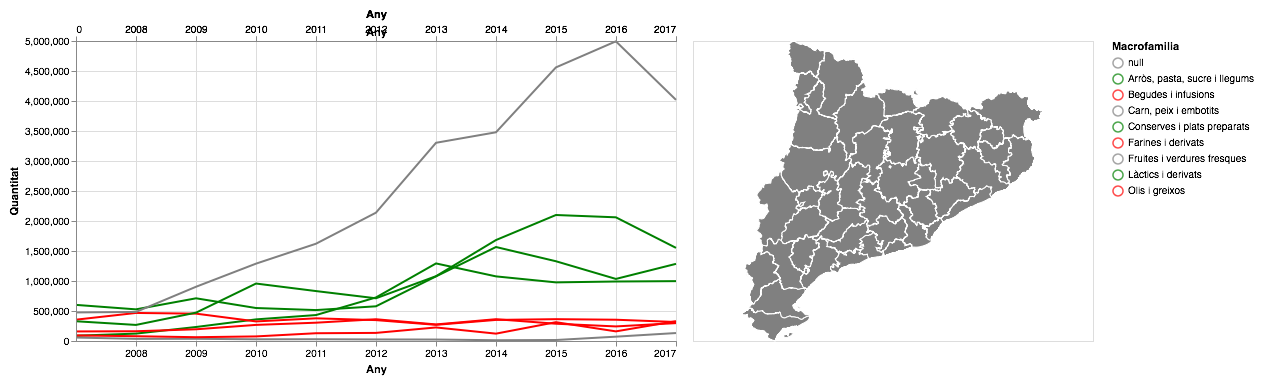

In [45]:
# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover', fields=['Any'], empty='none')

# The basic line
line = alt.Chart().mark_line().encode(
    x='Any:T',
    y='Quantitat:Q',
    color=alt.Color('NomMacrofamilia', legend=alt.Legend(title="Macrofamilia")),
    tooltip = ['NomMacrofamilia', 'Any', 'Quantitat', 'Quantitat_norm']
)

# Transparent selectors across the chart. This is what tells us the x-value of the cursor
selectors = alt.Chart().mark_point().encode(
    x='Any:Q',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(0), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'Quantitat', alt.value(''))
)

# Draw a rule at the location of the selection
rules = alt.Chart().mark_rule(color='gray').encode(
    x='Any:T',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
trend = alt.layer(line, selectors, points, rules, text,
          data=year_family_quantity, width=600, height=300)
#.configure_axis(
#    grid=False
#).configure_view(
#   strokeOpacity=0
#)

comarques = alt.topo_feature('comarques.json', 'comarques') 
map_com = alt.Chart(comarques).mark_geoshape(
    fill = "#666666",
    stroke = "white"
).encode(
    color = alt.Color(
        "NomMacroFamiliaTop:N",
        scale = alt.Scale(
            #domain=[0,2*10**5],
            range=["gray","green","red"]
        ),      
        #title = "Quantitat d'aliments"
    ),
    tooltip = [
        "properties.CODICOMAR:Q",
        "properties.NOMCOMAR:N",
        "NomMacroFamiliaTop:N",
        "Any:Q"
    ]
).transform_lookup(
    lookup = 'properties.NOMCOMAR',
    from_ = alt.LookupData(df_piv, 'NomComarca', ["NomMacroFamiliaTop","Any"])
).project(
    type = "mercator"
)#.transform_filter(nearest)

#map_com.save('../web/graphs/map.json')
#dashboard = (map_com)
#dashboard.save('../dashboard/dashboard_map.html')

trend | map_com



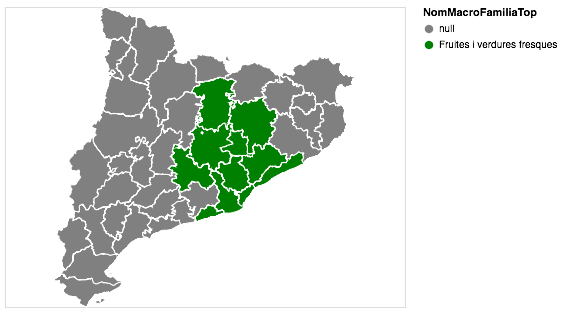

In [22]:
comarques = alt.topo_feature('comarques.json', 'comarques') 

map_com = alt.Chart(comarques).mark_geoshape(
    fill = "#666666",
    stroke = "white"
).encode(
    color = alt.Color(
        "NomMacroFamiliaTop:N",
        scale = alt.Scale(
            #domain=[0,2*10**5],
            range=["gray","green","red"]
        ),      
        #title = "Quantitat d'aliments"
    ),
    tooltip = [
        "properties.CODICOMAR:Q",
        "properties.NOMCOMAR:N",
        "NomMacroFamiliaTop:N",
        "Any:Q"
    ]
).transform_lookup(
    lookup = 'properties.NOMCOMAR',
    from_ = alt.LookupData(df_piv, 'NomComarca', ["NomMacroFamiliaTop","Any"])
).project(
    type = "mercator"
)#.transform_filter(
#    nearest
#)

#map_com.save('../web/graphs/map.json')
#dashboard = (map_com)
#dashboard.save('../dashboard/dashboard_map.html')

map_com

In [ ]:
import numpy as np

# Create the data
np.random.seed(42)
source = pd.DataFrame(np.cumsum(np.random.randn(100, 3), 0).round(2),
                    columns=['A', 'B', 'C'], index=pd.RangeIndex(100, name='x'))
source = source.reset_index().melt('x', var_name='category', value_name='y')

# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['x'], empty='none')

# The basic line
line = alt.Chart().mark_line(interpolate='basis').encode(
    x='x:Q',
    y='y:Q',
    color='category:N'
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart().mark_point().encode(
    x='x:Q',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'y:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart().mark_rule(color='gray').encode(
    x='x:Q',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(line, selectors, points, rules, text,
          data=source, width=600, height=300)

## Data Quality

In [17]:
df = load_df(PATH_DATA)
df.sort_values(
    ["Any","NomComarca","Quantitat"],
    ascending=[True, True, False],
    inplace=True
)
#df.set_index(["Any","IDComarca","NomComarca","NomMacrofamilia"], inplace=True)
print(df.shape)
df

(968, 7)


,NomComarca,Any,NomMacrofamilia,Quantitat,IDComarca,Poblacio,Quantitat_norm
5,Anoia,2007,Fruites i verdures fresques,5674.500,6,111004.0,51.119779
3,Anoia,2007,Conserves i plats preparats,5027.040,6,111004.0,45.287017
1,Anoia,2007,Begudes i infusions,3486.000,6,111004.0,31.404274
6,Anoia,2007,Làctics i derivats,3017.670,6,111004.0,27.185237
4,Anoia,2007,Farines i derivats,1414.100,6,111004.0,12.739181
0,Anoia,2007,"Arròs, pasta, sucre i llegums",688.500,6,111004.0,6.202479
7,Anoia,2007,Olis i greixos,645.000,6,111004.0,5.810601
2,Anoia,2007,"Carn, peix i embotits",481.500,6,111004.0,4.337682
91,Bages,2007,Conserves i plats preparats,511.620,7,175937.0,2.907973
94,Bages,2007,Làctics i derivats,308.300,7,175937.0,1.752332


In [64]:
mask = (df.Any == 2017) & (df.NomComarca == "Barcelonès")
print(df[mask]["Quantitat"].sum())
df[mask]

3251469.49


,NomComarca,Any,NomMacrofamilia,Quantitat,IDComarca,Poblacio,Quantitat_norm
344,Barcelonès,2017,"Arròs, pasta, sucre i llegums",337423.963,13,2226828.0,151.526729
345,Barcelonès,2017,Begudes i infusions,113517.558,13,2226828.0,50.977246
346,Barcelonès,2017,"Carn, peix i embotits",45930.820,13,2226828.0,20.626119
347,Barcelonès,2017,Conserves i plats preparats,443690.187,13,2226828.0,199.247624
348,Barcelonès,2017,Farines i derivats,102854.992,13,2226828.0,46.189015
349,Barcelonès,2017,Fruites i verdures fresques,1474550.868,13,2226828.0,662.175466
350,Barcelonès,2017,Làctics i derivats,625464.373,13,2226828.0,280.876823
351,Barcelonès,2017,Olis i greixos,108036.729,13,2226828.0,48.515974


In [63]:
mask = (food.Any == '2017-01-01') & (food.NomComarca == "Barcelonès") & (food.NomMacrofamilia == "Farines i derivats")
print(food[mask]["Quantitat"].sum())
food[mask]

102854.99199999997


,IDComarca,IDMunicipi,Quantitat,Any,NomComarca,NomMunicipi,IDMacrofamilia,NomMacrofamilia
6864,13,80155,8384.800,2017-01-01,Barcelonès,Badalona,B,Farines i derivats
6875,13,80155,5067.492,2017-01-01,Barcelonès,Badalona,B,Farines i derivats
6876,13,8019301,10668.700,2017-01-01,Barcelonès,Ciutat Vella,B,Farines i derivats
6887,13,8019301,3968.000,2017-01-01,Barcelonès,Ciutat Vella,B,Farines i derivats
6888,13,8019306,3995.200,2017-01-01,Barcelonès,Gràcia,B,Farines i derivats
6899,13,8019306,1006.000,2017-01-01,Barcelonès,Gràcia,B,Farines i derivats
6900,13,8019307,4280.000,2017-01-01,Barcelonès,Horta-Guinardó,B,Farines i derivats
6911,13,8019307,2367.000,2017-01-01,Barcelonès,Horta-Guinardó,B,Farines i derivats
6912,13,81017,8616.250,2017-01-01,Barcelonès,l'Hospitalet de Llobregat,B,Farines i derivats
6923,13,81017,3184.000,2017-01-01,Barcelonès,l'Hospitalet de Llobregat,B,Farines i derivats


In [62]:
np.sum(list(food[mask]["Quantitat"]))

102854.99199999997

---

## Load Data

In [50]:
food = pd.read_pickle(PATH_DATA + 'foodpandas.pkl')
print(food.shape)
food.head()

(8838, 8)


,IDComarca,IDMunicipi,Quantitat,Any,NomComarca,NomMunicipi,IDMacrofamilia,NomMacrofamilia
0,6,80446,453.38,2017-01-01,Anoia,Capellades,H,Fruites i verdures fresques
1,6,80446,1727.06,2016-01-01,Anoia,Capellades,H,Fruites i verdures fresques
2,6,80446,683.08,2015-01-01,Anoia,Capellades,H,Fruites i verdures fresques
3,6,80446,132.00,2017-01-01,Anoia,Capellades,H,Fruites i verdures fresques
4,6,81022,36364.13,2017-01-01,Anoia,Igualada,H,Fruites i verdures fresques


In [86]:
food[["IDComarca","NomComarca"]].drop_duplicates()

,IDComarca,NomComarca
0,6,Anoia
62,7,Bages
108,11,Baix Llobregat
340,13,Barcelonès
496,14,Berguedà
508,17,Garraf
545,21,Maresme
691,24,Osona
751,40,Vallès Occidental
899,41,Vallès Oriental


In [59]:
mask = (food.Any == '2017-01-01') & (food.NomComarca == "Anoia") & (food.NomMacrofamilia == "Fruites i verdures fresques")
food[mask]

,IDComarca,IDMunicipi,Quantitat,Any,NomComarca,NomMunicipi,IDMacrofamilia,NomMacrofamilia
0,6,80446,453.380,2017-01-01,Anoia,Capellades,H,Fruites i verdures fresques
3,6,80446,132.000,2017-01-01,Anoia,Capellades,H,Fruites i verdures fresques
4,6,81022,36364.130,2017-01-01,Anoia,Igualada,H,Fruites i verdures fresques
15,6,81022,23797.100,2017-01-01,Anoia,Igualada,H,Fruites i verdures fresques
16,6,81653,359.900,2017-01-01,Anoia,la Pobla de Claramunt,H,Fruites i verdures fresques
20,6,81653,90.000,2017-01-01,Anoia,la Pobla de Claramunt,H,Fruites i verdures fresques
29,6,81192,939.000,2017-01-01,Anoia,Masquefa,H,Fruites i verdures fresques
30,6,81430,1280.000,2017-01-01,Anoia,Òdena,H,Fruites i verdures fresques
31,6,81614,21009.890,2017-01-01,Anoia,Piera,H,Fruites i verdures fresques
40,6,81614,21648.472,2017-01-01,Anoia,Piera,H,Fruites i verdures fresques


In [9]:
comarques = pd.read_pickle(PATH_DATA + 'comarques.pkl')
print(comarques.shape)
comarques.sort_values(
    by = ["NomComarca"],
    ascending = [True],
    inplace = True
)
comarques.head(20)

(12, 1)


,NomComarca
IDComarca,
3,Alt Penedès
6,Anoia
7,Bages
11,Baix Llobregat
13,Barcelonès
14,Berguedà
17,Garraf
21,Maresme
42,Moianès


In [10]:
beneficiarisComarca = pd.read_pickle(PATH_DATA + 'beneficiarisComarca.pkl')
print(beneficiarisComarca.shape)
beneficiarisComarca.head(20)

(110, 3)


,Beneficiaris,NomComarca,Any
0,209636,Anoia,2008-01-01
1,257788,Anoia,2009-01-01
2,321905,Anoia,2010-01-01
3,416867,Anoia,2011-01-01
4,378994,Anoia,2012-01-01
5,728082,Anoia,2013-01-01
6,1009281,Anoia,2014-01-01
7,926150,Anoia,2015-01-01
8,926150,Anoia,2016-01-01
9,794240,Anoia,2017-01-01


In [11]:
comarcaAnyAliment = pd.read_pickle(PATH_DATA + 'comarcaAnyAliment.pkl')
print(comarcaAnyAliment.shape)
comarcaAnyAliment.head()

(1148, 4)


,IDComarca,Macrofamilia,Quantitat,Any
0,,A,2055.77,2007-01-01
1,,B,2474.43,2007-01-01
2,,C,-2643.52,2007-01-01
3,,D,-3161.57,2007-01-01
4,,E,339.50,2007-01-01


In [12]:
macrofamilies = pd.read_pickle(PATH_DATA + 'macrofamilies.pkl')
print(macrofamilies.shape)
macrofamilies.head()

(8, 2)


,IDMacrofamilia,NomMacrofamilia
0,A,Làctics i derivats
1,B,Farines i derivats
2,C,"Arròs, pasta, sucre i llegums"
3,D,Conserves i plats preparats
4,E,Olis i greixos


In [13]:
municipis = pd.read_pickle(PATH_DATA + 'municipis.pkl')
print(municipis.shape)
municipis.head()

(321, 2)


,IDComarca,NomMunicipi
IDMunicipi,,
80018,11,Abrera
80023,7,Aguilar de Segarra
80142,41,Aiguafreda
80039,21,Alella
80044,24,Alpens


In [14]:
repartiment = pd.read_pickle(PATH_DATA + 'repartiment.pkl')
print(repartiment.shape)
repartiment.head()

(8838, 5)


,IDComarca,Macrofamilia,IDMunicipi,Quantitat,Any
0,6,H,80446,453.38,2017-01-01
1,6,G,80446,307.10,2017-01-01
2,6,F,80446,146.56,2017-01-01
3,6,E,80446,150.00,2017-01-01
4,6,D,80446,475.75,2017-01-01
